In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
import math


In [2]:
def gaussian_kernel(kernel_size, sigma = None):
    if not sigma:
        sigma = np.sqrt(kernel_size)
    print("Sigma = {}".format(sigma))
    mu = np.floor(kernel_size / 2)
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            kernel[i, j] = np.exp(-((np.square(i-mu) +
            np.square(j-mu)) /( 2 * np.square(sigma))) ) / (sigma * np.sqrt(2 * math.pi))
    kernel = kernel/np.sum(kernel)
    return kernel

In [3]:
def convolution(kernel, image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            
    return output



In [4]:
def check_bluring(images, kernel_sizes):
    print(f"Original image has variance_of_laplacian = {variance_of_laplacian(images[0])}")
    for idx, image in enumerate(images[1:]):
        print(f"Image with kernel size {kernel_sizes[idx]} has variance_of_laplacian = {variance_of_laplacian(image)}")

In [5]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [6]:
def plot_kernel(kernel):
    print("Kernel Shape : {}".format(kernel.shape))
    plt.imshow(kernel, cmap='gray')
    plt.show()

In [7]:
def plot_images(input_image, blured_images, kernel_sizes):
    fig = plt.figure(figsize=(12, 15))
    columns = 2
    rows = 2
    ax = []
    ax.append( fig.add_subplot(rows, columns, 1) )
    ax[-1].set_title("Input Image")
    plt.imshow(input_image)
    for count ,image in enumerate(blured_images, 1):
        ax.append( fig.add_subplot(rows, columns, count+1) )
        ax[-1].set_title(f'Gaussian Blur: kernel_size = {kernel_sizes[count - 1]}') 
        plt.imshow(image, cmap="gray")

    plt.show()

Sigma = 1.7320508075688772
Kernel Shape : (3, 3)


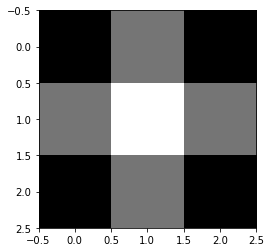

In [8]:
kernel_3 = gaussian_kernel(3)
plot_kernel(kernel_3)

Sigma = 3
Kernel Shape : (3, 3)


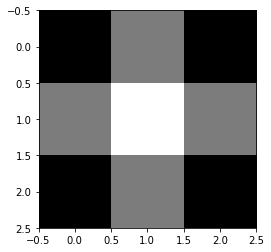

In [9]:
kernel_3_3 = gaussian_kernel(3,3)
plot_kernel(kernel_3_3)

Sigma = 2.23606797749979
Kernel Shape : (5, 5)


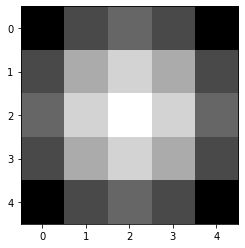

In [10]:
kernel_5 = gaussian_kernel(5)
plot_kernel(kernel_5)

Sigma = 5
Kernel Shape : (5, 5)


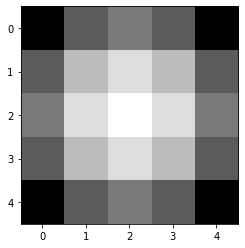

In [11]:
kernel_5_5 = gaussian_kernel(5,5)
plot_kernel(kernel_5_5)

Sigma = 2.6457513110645907
Kernel Shape : (7, 7)


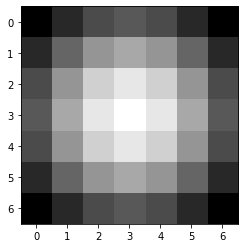

In [12]:
kernel_7 = gaussian_kernel(7)
plot_kernel(kernel_7)

Sigma = 7
Kernel Shape : (7, 7)


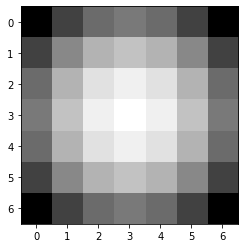

In [13]:
kernel_7_7 = gaussian_kernel(7,7)
plot_kernel(kernel_7_7)

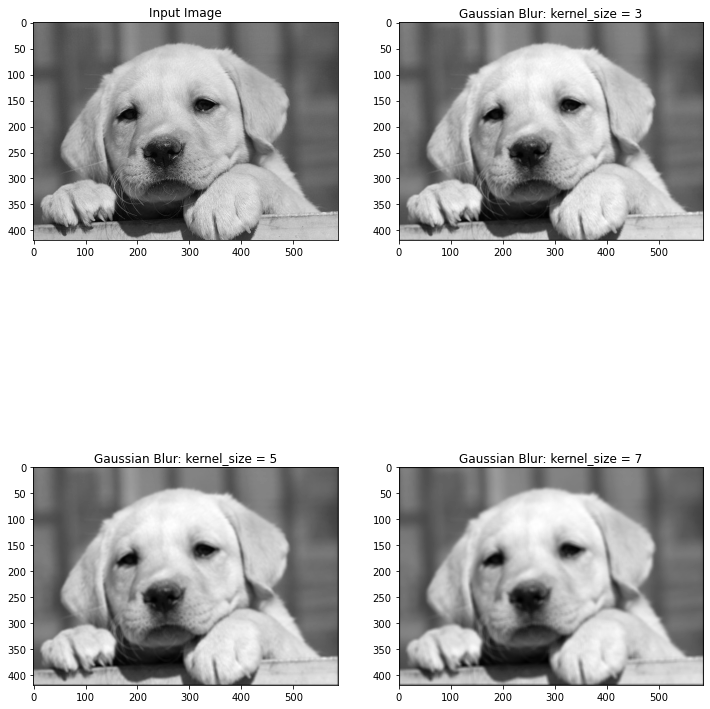

Original image has variance_of_laplacian = 869.6416534428292
Image with kernel size 3 has variance_of_laplacian = 105.42966616518378
Image with kernel size 5 has variance_of_laplacian = 36.09181235696218
Image with kernel size 7 has variance_of_laplacian = 17.63964974853538


In [14]:
image_1 = cv2.imread('img1.png')
blured_image_3_3= convolution(kernel_3_3, image_1)
blured_image_5_5= convolution(kernel_5_5, image_1)
blured_image_7_7= convolution(kernel_7_7, image_1)
plot_images(image_1, [blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])
check_bluring([image_1, blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])

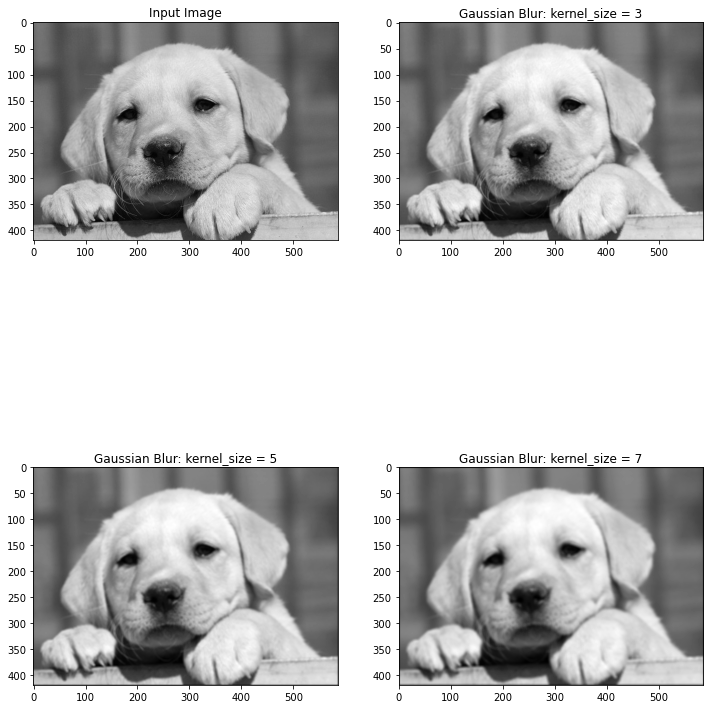

Original image has variance_of_laplacian = 869.6416534428292
Image with kernel size 3 has variance_of_laplacian = 99.48516532277164
Image with kernel size 5 has variance_of_laplacian = 37.47709288705035
Image with kernel size 7 has variance_of_laplacian = 20.82027810557731


In [15]:
image_1_no_sigma = cv2.imread('img1.png')
blured_image_3= convolution(kernel_3, image_1_no_sigma)
blured_image_5= convolution(kernel_5, image_1_no_sigma)
blured_image_7= convolution(kernel_7, image_1_no_sigma)
plot_images(image_1_no_sigma, [blured_image_3, blured_image_5, blured_image_7], [3,5,7])
check_bluring([image_1_no_sigma,blured_image_3, blured_image_5, blured_image_7], [3,5,7])

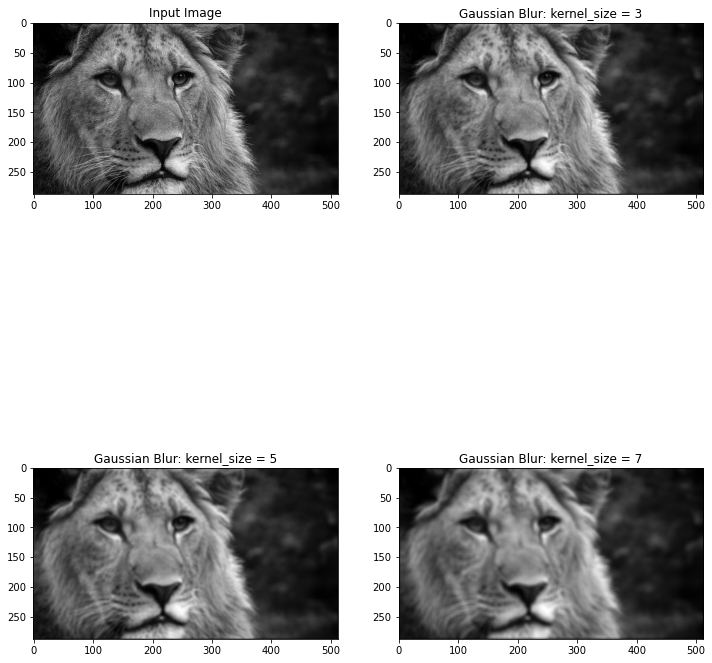

Original image has variance_of_laplacian = 3136.906819130489
Image with kernel size 3 has variance_of_laplacian = 124.21876141327351
Image with kernel size 5 has variance_of_laplacian = 31.974578126459406
Image with kernel size 7 has variance_of_laplacian = 13.381789114823173


In [16]:
image_2 = cv2.imread('img2.png')
blured_image_3_3= convolution(kernel_3_3, image_2)
blured_image_5_5= convolution(kernel_5_5, image_2)
blured_image_7_7= convolution(kernel_7_7, image_2)
plot_images(image_2, [blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])
check_bluring([image_2,blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])

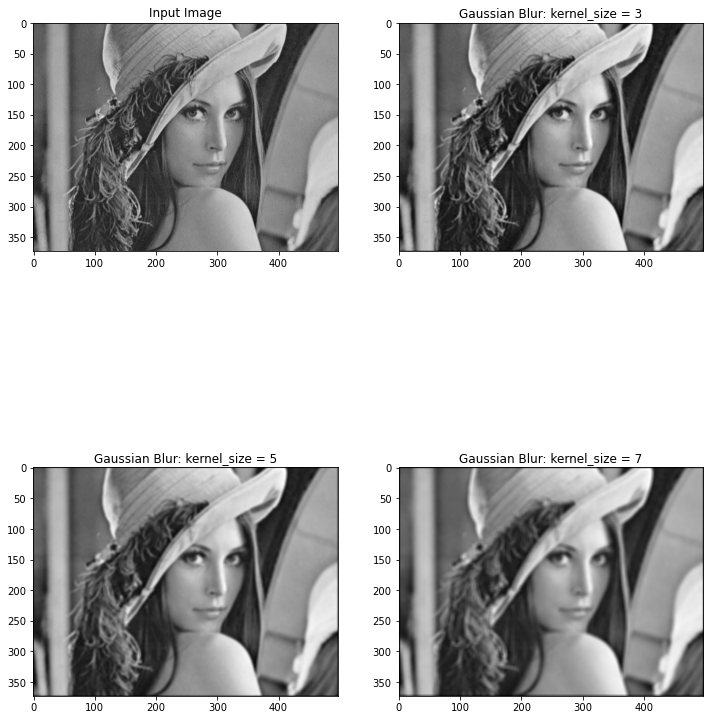

Original image has variance_of_laplacian = 380.5686115869207
Image with kernel size 3 has variance_of_laplacian = 134.60320814650723
Image with kernel size 5 has variance_of_laplacian = 44.36173128899171
Image with kernel size 7 has variance_of_laplacian = 21.216745547275064


In [17]:
image_3 = cv2.imread('img3.png')
blured_image_3_3= convolution(kernel_3_3, image_3)
blured_image_5_5= convolution(kernel_5_5, image_3)
blured_image_7_7= convolution(kernel_7_7, image_3)
plot_images(image_3, [blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])
check_bluring([image_3, blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])

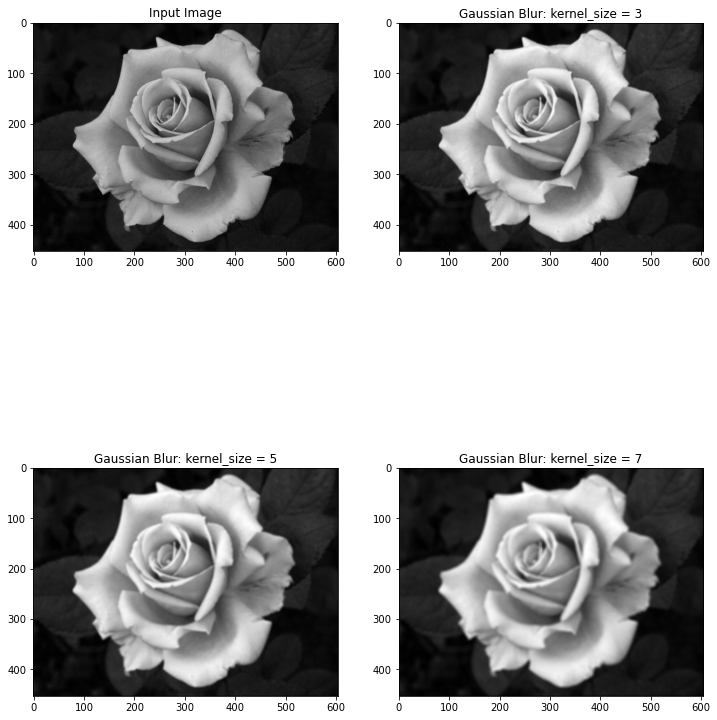

Original image has variance_of_laplacian = 109.50537016230142
Image with kernel size 3 has variance_of_laplacian = 21.475345169534243
Image with kernel size 5 has variance_of_laplacian = 6.684089810983214
Image with kernel size 7 has variance_of_laplacian = 3.0220933716307843


In [18]:
image_4 = cv2.imread('img4.png', 3)
blured_image_3_3= convolution(kernel_3_3, image_4)
blured_image_5_5= convolution(kernel_5_5, image_4)
blured_image_7_7= convolution(kernel_7_7, image_4)
plot_images(image_4, [blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])
check_bluring([image_4, blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])

Dilation

In [23]:
def dilate_image(image, dilation_level=3):
    dilation_level = 3 if dilation_level < 3 else dilation_level
    
    kernel = np.full(shape=(dilation_level, dilation_level), fill_value=255)
    
    orig_shape = image.shape
    pad_width = dilation_level - 2
    
    padded_img = np.pad(array=image, pad_width=pad_width, mode='constant')
    padded_img_shape = padded_img.shape
    h_reduce, w_reduce = (padded_img_shape[0] - orig_shape[0]), (padded_img_shape[1] - orig_shape[1])
    
    submatrices = np.array([
        padded_img[i:(i + dilation_level), j:(j + dilation_level)]
        for i in range(padded_img_shape[0] - h_reduce) for j in range(padded_img_shape[1] - w_reduce)
    ])
    
    image_dilate = np.array([255 if (i == kernel).any() else 0 for i in submatrices])
    image_dilate = image_dilate.reshape(orig_shape)
    
    return image_dilate

In [24]:
def convert_binary(image_src, thresh_val=127):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

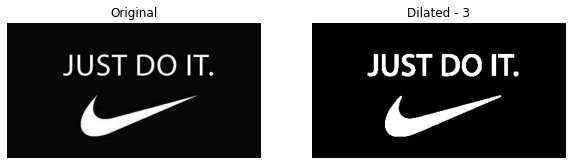

In [27]:
image = cv2.imread('image_for_dilation.jfif', 0)
dilation_level = 3
image_dilate = dilate_image(convert_binary(image), dilation_level)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Dilated - {}".format(dilation_level))

ax1.imshow(image, cmap="gray")
ax2.imshow(image_dilate, cmap="gray")
plt.show()

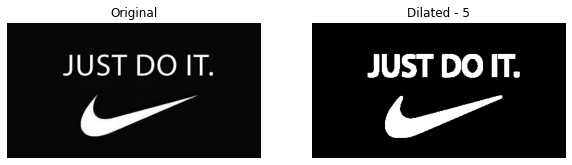

In [28]:
image = cv2.imread('image_for_dilation.jfif', 0)
dilation_level = 5
image_dilate = dilate_image(convert_binary(image), dilation_level)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Dilated - {}".format(dilation_level))

ax1.imshow(image, cmap="gray")
ax2.imshow(image_dilate, cmap="gray")
plt.show()